CASE - 

There is a finance company that gives loan to peoples. Before approving the loan company analyzes the credentials of the people. Company wants to automate the loan approval process. The person who wants loan should fill the online form. Based on the information given by user we need to develope machine learning system that can tell the company about the eligibility for loan of a person.

WORK FLOW -

Loan data

Data PreProcessing

Train Test Split

Support Vector Machine Model

Trained Support Vector Machine Model

New data

Prediction

Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection & PreProcessing

In [4]:
# Loading the dataset

data = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Loan Approval Prediction System Using SVM\loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Checking the shape of data

data.shape

(614, 13)

In [7]:
# Statistical Measures of the data

data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# Checking missing values

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Dropping the missing values

data = data.dropna()

In [10]:
# Checking missing values

data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
# Label Encoding

data.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace = True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [13]:
# Dependents column values

data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [14]:
# Replacing the value of 3+ to 4

data = data.replace(to_replace = '3+', value = 4)

In [16]:
# Dependents values

data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualisation -

It is helpfull to Analyse & to find the relationship between various features.

<AxesSubplot:xlabel='Education', ylabel='count'>

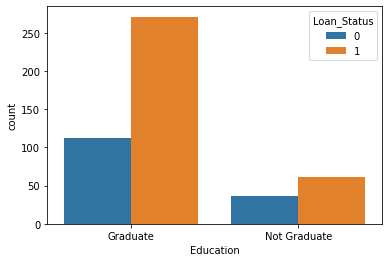

In [17]:
# Education & Loan status

sns.countplot(x = 'Education', hue = 'Loan_Status', data = data)

<AxesSubplot:xlabel='Married', ylabel='count'>

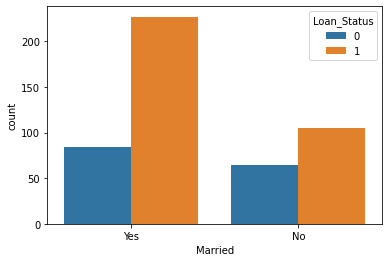

In [18]:
# Marital status & Loan status

sns.countplot(x = 'Married', hue = 'Loan_Status', data = data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

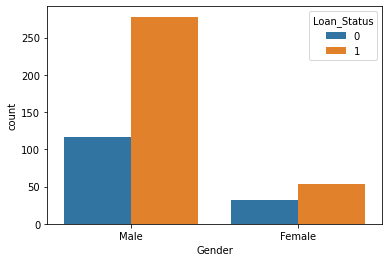

In [19]:
# Gender status & Loan status

sns.countplot(x = 'Gender', hue = 'Loan_Status', data = data)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

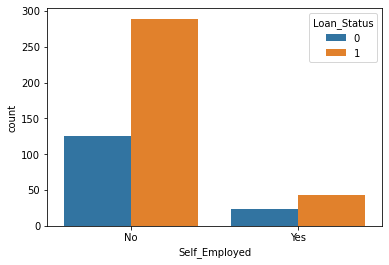

In [20]:
# Self Employed status & Loan status

sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data = data)

In [23]:
# Converting categorical columns to numerical values

data.replace({'Married':{'No':0, 'Yes':1}, 'Gender':{'Male':1, 'Female':0}, 'Self_Employed':{'No':0, 'Yes':1},
             'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}, 'Education':{'Graduate':1, 'Not Graduate':0}},
            inplace = True) 

In [24]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


Separating Data & Label

In [25]:
x = data.drop(columns = ['Loan_ID', 'Loan_Status'], axis = 1)
y = data['Loan_Status']

In [26]:
print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Splitting the Data into Train & Test

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, stratify = y, random_state = 2)
print(x.shape, x_train.shape, x_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model - 

Support Vector Machine Model - There is a central line called 'Hyperplane' which split the data in classes & tries to find the distance between. When we give a new data it checks in which class the value is being fitted. This model tries to fit this data around 'Hyperplane'. Support vectors has to be as far from 'Hyperplane' as possible, they are the data points that are close to the Hyperplane & the distance between Support Vectors & Hyperplane is called as 'Margin'.

In [28]:
classifier = svm.SVC(kernel = 'linear')

In [29]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

Model Evaluation

In [30]:
# Accuracy score for training data

x_train_prediction = classifier.predict(x_train)
train_data_accuracy = accuracy_score(x_train_prediction, y_train)
print('Accuracy on Training Data :', train_data_accuracy)

Accuracy on Training Data : 0.7986111111111112


In [31]:
# Accuracy score for testing data

x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on Testning Data :', test_data_accuracy)

Accuracy on Testning Data : 0.8333333333333334


CONCLUSION -

Accuracy score of our model is pretty good, our model should be used for prediction.

Making a Predictive System

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)

# Predicting input Data

input_data = (1,1,1,1,0,4583,1508,128,360,1,0)

# Changing input_data to numpy array

input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Standardize the input_dat

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('Loan is NOT Approved')
else:
    print('Loan is Approved')

[[ 0.46719815  0.73716237  0.11235219  0.50325312 -0.3992747  -0.13796959
  -0.02795204 -0.20808917  0.27554157  0.41319694 -1.31886834]]
[1]
Loan is Approved


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
